# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# **Load Dataset**

In [2]:
AND = pd.read_csv("/content/AND.csv")
OR = pd.read_csv("/content/OR.csv")
AND_NOT = pd.read_csv("/content/AND_NOT.csv")
XOR = pd.read_csv("/content/XOR.csv")
ANGKA = pd.read_csv("/content/Angka.csv")

datasets = {
    "AND": AND,
    "OR": OR,
    "AND_NOT": AND_NOT,
    "XOR": XOR,
    "ANGKA": ANGKA
}

datasets

{'AND':    X1  X2  Y
 0   0   0  0
 1   0   1  0
 2   1   0  0
 3   1   1  1,
 'OR':    X1  X2  Y
 0   0   0  0
 1   0   1  1
 2   1   0  1
 3   1   1  1,
 'AND_NOT':    X1  X2  Y
 0   0   0  0
 1   0   1  0
 2   1   0  1
 3   1   1  0,
 'XOR':    X1  X2  Y
 0   0   0  0
 1   0   1  1
 2   1   0  1
 3   1   1  0,
 'ANGKA':     a1  a2  a3  a4  a5  a6  a7  a8  a9  a10  ...  a92  a93  a94  a95  a96  \
 0    0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0   
 1    0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0   
 2    0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0   
 3    0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0   
 4    0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0   
 ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
 75   0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0   
 76   0   0   0   1   1   1   1   0   0    0  ...   

# **Fungsi Single Perceptron**

In [3]:
class SinglePerceptron:
    def __init__(self, lr=0.1, epochs=50):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.losses = []

        for _ in range(self.epochs):
            total_loss = 0
            for xi, target in zip(X, y):
                linear = np.dot(xi, self.weights) + self.bias
                pred = 1 if linear >= 0 else 0
                error = target - pred

                self.weights += self.lr * error * xi
                self.bias += self.lr * error
                total_loss += error**2

            self.losses.append(total_loss)

    def predict(self, X):
        linear = np.dot(X, self.weights) + self.bias
        return np.where(linear >= 0, 1, 0)

Class SinglePerceptron merupakan implementasi perceptron tunggal yang dilatih menggunakan aturan pembaruan bobot berdasarkan error. Konstruktor menerima dua parameter, yaitu lr (learning rate) dan epochs sebagai jumlah iterasi pelatihan. Pada metode fit(), bobot awal diinisialisasi dengan nol dan bias di-set ke 0; kemudian untuk setiap epoch dilakukan proses pembelajaran dengan menghitung nilai linear (np.dot(xi, weights) + bias) untuk setiap data, menentukan prediksi biner (1 jika linear ≥ 0, selain itu 0), lalu menghitung error antara target dan prediksi. Bobot dan bias diperbarui menggunakan rumus perceptron: weights += lr * error * xi dan bias += lr * error. Total error kuadrat setiap epoch disimpan dalam self.losses sebagai indikator konvergensi model. Sementara metode predict() menghitung nilai linear untuk masukan baru dan mengembalikan prediksi 1 atau 0 berdasarkan apakah nilai tersebut melewati ambang 0. Secara keseluruhan, kode ini menunjukkan cara kerja perceptron sederhana untuk mempelajari keputusan linear pada dataset biner.

# **Latih Single Perceptron Semua Dataset**

AND Accuracy: 1.00


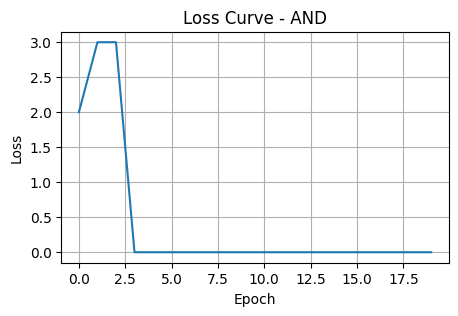

OR Accuracy: 1.00


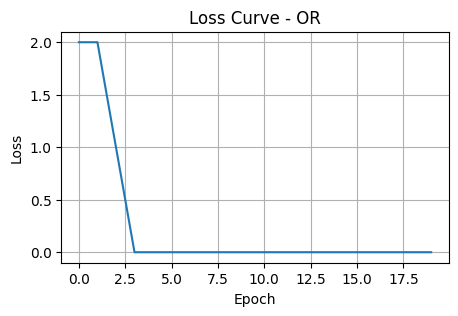

AND_NOT Accuracy: 1.00


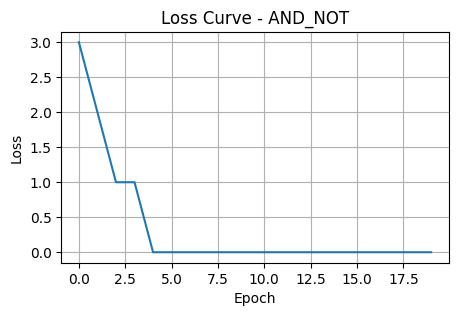

XOR Accuracy: 0.50


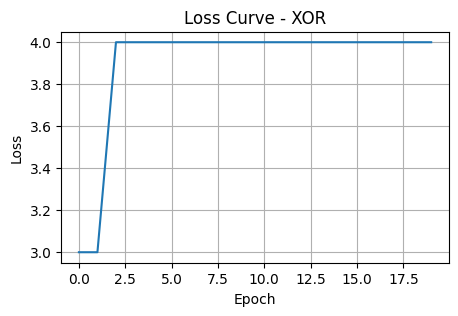

ANGKA Accuracy: 0.10


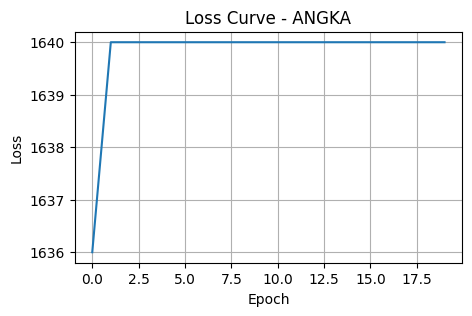

In [4]:
results = {}

for name, df in datasets.items():
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    perceptron = SinglePerceptron(lr=0.1, epochs=20)
    perceptron.fit(X, y)
    y_pred = perceptron.predict(X)
    acc = accuracy_score(y, y_pred)

    results[name] = {"model": perceptron, "accuracy": acc}

    print(f"{name} Accuracy: {acc:.2f}")

    # Plot Loss Curve
    plt.figure(figsize=(5,3))
    plt.plot(perceptron.losses)
    plt.title(f"Loss Curve - {name}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()


Analisa:
Single Perceptron hanya mampu mempelajari fungsi yang linear separable, yaitu data yang dapat dipisahkan oleh satu garis lurus.

AND — linear
OR — linear
AND-NOT — linear

XOR — tidak linear separable
Tidak ada garis lurus yang bisa memisahkan nilai class XOR.

Angka — fitur lebih kompleks
Dataset angka biasanya memiliki pola multidimensi dan nonlinear, sehingga tidak bisa dipelajari oleh model linear sederhana.

Karena itu, Perceptron tidak mungkin mencapai akurasi 100% pada XOR & Angka

# **Multilayer Perceptron untuk XOR dan Angka**

In [5]:
def train_mlp(dataset_name):
    df = datasets[dataset_name]
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    mlp = MLPClassifier(
        hidden_layer_sizes=(8,8),
        activation='relu',
        solver='adam',
        max_iter=500,
        learning_rate_init=0.01,
        random_state=1
    )

    mlp.fit(X_scaled, y)
    y_pred = mlp.predict(X_scaled)
    acc = accuracy_score(y, y_pred)

    print(f"MLP Accuracy for {dataset_name}: {acc:.2f}")

    # Plot loss curve
    plt.figure(figsize=(5,3))
    plt.plot(mlp.loss_curve_)
    plt.title(f"MLP Loss Curve - {dataset_name}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    return mlp

Fungsi train_mlp(dataset_name) digunakan untuk melatih model Multilayer Perceptron (MLP) pada dataset tertentu. Pertama, dataset diambil berdasarkan nama dan dipisahkan menjadi fitur (X) serta label (y). Karena MLP sensitif terhadap skala data, fitur dinormalisasi menggunakan StandardScaler sehingga memiliki rata-rata 0 dan standar deviasi 1. Setelah itu, model MLP diinisialisasi dengan arsitektur dua hidden layer berukuran (8, 8), fungsi aktivasi ReLU, optimizer Adam, jumlah iterasi maksimum 500, dan learning rate awal 0.01. Model kemudian dilatih menggunakan data yang sudah dinormalisasi, lalu dilakukan prediksi kembali pada data training untuk menghitung akurasi menggunakan accuracy_score. Hasil akurasi dicetak sebagai output. Selain itu, fungsi menampilkan loss curve yang menunjukkan perkembangan penurunan error selama proses training—grafik ini membantu mengevaluasi apakah model sudah konvergen atau masih perlu penyesuaian parameter. Pada akhir fungsi, model MLP yang sudah terlatih dikembalikan untuk digunakan pada proses evaluasi atau prediksi lanjutan.

# **Latih MLP untuk XOR dan Angka**

MLP Accuracy for XOR: 1.00


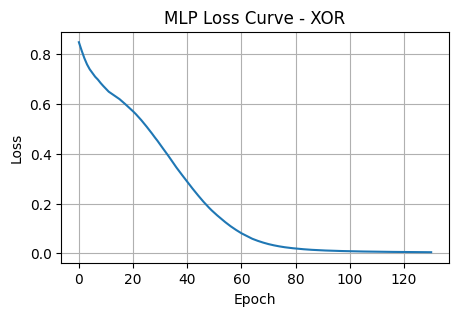

MLP Accuracy for ANGKA: 0.99


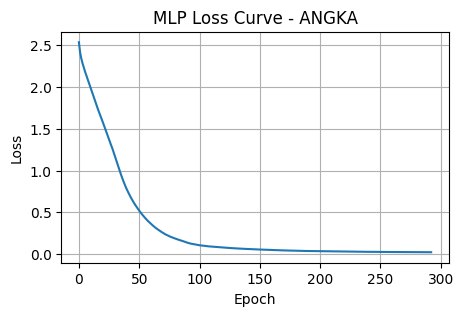

In [6]:
mlp_xor = train_mlp("XOR")
mlp_angka = train_mlp("ANGKA")

Kedua baris kode tersebut memanggil fungsi train_mlp() untuk melatih model Multilayer Perceptron (MLP) pada dua dataset berbeda, yaitu dataset XOR dan dataset ANGKA. Pemanggilan train_mlp("XOR") akan menjalankan seluruh proses pelatihan MLP pada data XOR—mulai dari normalisasi fitur, inisialisasi arsitektur dua hidden layer, proses training, perhitungan akurasi, hingga menampilkan loss curve, lalu hasil model disimpan pada variabel mlp_xor. Hal yang sama terjadi pada pemanggilan train_mlp("ANGKA"), namun menggunakan dataset angka, dan hasil modelnya disimpan pada variabel mlp_angka. Dengan cara ini, kedua model dapat dibandingkan performanya, misalnya apakah MLP mampu menyelesaikan pola non-linear seperti XOR dan apakah mampu mengenali pola lebih kompleks pada dataset angka.